# Arts England Grant Allocation Analysis 

### 1. Setting up the Environment


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [11]:
# Configuration for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-whitegrid')

### 2. Loading Data


In [51]:
# Load the data
df = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2024-25.csv')
df = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2023-24.csv')
df = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2022-23.csv')
df = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2021-22.csv')
df = pd.read_csv('/Users/segunAM/Downloads/ArtsCouncil/raw_data/pga2020-21.csv')

# merge all dataframes
df = pd.concat([df, df, df, df, df], ignore_index=True)

# Data loaded successfully print successful statement
if df.empty:
    print("Data loading failed.")
else:
    # Check for missing values
    # missing_values = df.isnull().sum()
    # if missing_values.any():
    #    print("Missing values found in the dataset:")
    #    print(missing_values[missing_values > 0])
    #else:
#print("No missing values found in the dataset.")
    print("Data loaded successfully.")



Data loaded successfully.


### 3. Initial Inspection

In [52]:
# Show the first few rows of the dataframe
#print("Data preview:", df.head(10))
display(df.head(10))

# Check the shape of the dataframe
#print("Dataframe shape:", df.shape)
display(df.shape)

# check the summary statistics of the dataframe
print("Summary statistics in table:",)
display(df.describe(include='all').T)


,Recipient,Activity name,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority
0,Santhoshkumar Thadavath Gopalakrishnan Nair,Dancing Deities,"£13,250",6-Apr-20,April,Q1,North,Bradford,Dance,"£15,000 and below",NaN
1,Sheba Soul Ensemble,Questions and answers,"£15,000",11-Aug-20,August,Q2,South West,"Bristol, City of",Theatre,"£15,000 and below",NaN
2,Southampton Music Hub,Digital Native Artists (DNA) Programme,"£15,000",11-Aug-20,August,Q2,South West,Southampton,Music,"£15,000 and below",NaN
3,Kieron Burke,Research and Development of Grime Orchestra,"£11,800",11-Aug-20,August,Q2,Midlands,Birmingham,Music,"£15,000 and below",NaN
4,Tara Silverthorn,'if a bee falls in a forest': Research & Devel...,"£5,507",11-Aug-20,August,Q2,South West,"Bristol, City of",Combined arts,"£15,000 and below",NaN
5,Old Town Sounds Ltd,New Music for a New Era,"£14,586",11-Aug-20,August,Q2,South West,Swindon,Music,Grassroots Music,NaN
6,strange futures,Malvern cube residency,"£14,925",11-Aug-20,August,Q2,Midlands,Dudley,Theatre,"£15,000 and below",NaN
7,Tom Wright,I Ain't Dumb,"£14,995",11-Aug-20,August,Q2,Midlands,Coventry,Theatre,"£15,000 and below",NaN
8,Avatara Ayuso,The Protocol. Outdoor Contemporary Dance Work,"£14,962",11-Aug-20,August,Q2,Midlands,Warwick,Dance,"£15,000 and below",NaN
9,Caroline Summerfield,The Gardening Times,"£14,110",11-Aug-20,August,Q2,South West,Tewkesbury,Theatre,"£15,000 and below",NaN


(14690, 11)

Summary statistics in table:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recipient,14690,2816,Botis Seva,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity name,14690,2934,RAT,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Award amount,14690,1712,"£15,000",2090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Award date,14690,104,16-Dec-20,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Month,14690,9,October,2745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision quarter,14690,4,Q3,6225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACE Area,14690,5,London,4145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Local authority,14690,303,Hackney,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main discipline,14690,9,Theatre,4845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strand,14690,5,"£15,000 and below",12175,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Check the data types of the columns
print("Data types:")
display(df.dtypes)


# Show the last few rows of the dataframe
print("Data preview: last 10 rows") 
display(df.tail(10))

# Show basic statistics of the dataframe
print("\nBasic stats") 
df.info()

Data types:


Recipient                 object
Activity name             object
Award amount              object
Award date                object
Decision Month            object
Decision quarter          object
ACE Area                  object
Local authority           object
Main discipline           object
Strand                    object
Time-Limited Priority    float64
dtype: object

Data preview: last 10 rows


,Recipient,Activity name,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority
14680,Helen Clare Farrow,Reinventing Texture: Japan,"£15,000",25-Mar-21,March,Q4,London,Richmond upon Thames,Visual arts,"£15,000 and below",NaN
14681,Union Chapel Project,Union Chapel Project,"£14,656",25-Mar-21,March,Q4,London,Islington,Music,"£15,000 and below",NaN
14682,Holly Argent,Women Artists of the North East Library 2021-22,"£30,769",25-Mar-21,March,Q4,North,Gateshead,Visual arts,"Above £15,000",NaN
14683,Theatre Temoin Limited,Local Voices,"£30,000",25-Mar-21,March,Q4,South East,Colchester,Theatre,"Above £15,000",NaN
14684,Creative Arts East,Plugged In,"£49,648",25-Mar-21,March,Q4,South East,South Norfolk,Combined arts,"Above £15,000",NaN
14685,FarGo Village,FarGo Village Outdoor Arts creative programming,"£49,990",26-Mar-21,March,Q4,Midlands,Coventry,Combined arts,"Above £15,000",NaN
14686,Rugby League World Cup 2021,RLWC2021 Culture Festival,"£949,581",26-Mar-21,March,Q4,North,Trafford,Combined arts,"National activity above £100,000",NaN
14687,Jaivant Patel Company CIC,Next Steps Resubmission,"£49,995",26-Mar-21,March,Q4,Midlands,Wolverhampton,Dance,"Above £15,000",NaN
14688,Humanhood,"Two years of artistic development, YinYang and ∞","£250,000",26-Mar-21,March,Q4,Midlands,Birmingham,Dance,"National activity above £100,000",NaN
14689,Ort Gallery,Warmth,"£70,073",26-Mar-21,March,Q4,Midlands,Birmingham,Visual arts,"Above £15,000",NaN



Basic stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipient              14690 non-null  object 
 1   Activity name          14690 non-null  object 
 2   Award amount           14690 non-null  object 
 3   Award date             14690 non-null  object 
 4   Decision Month         14690 non-null  object 
 5   Decision quarter       14690 non-null  object 
 6   ACE Area               14690 non-null  object 
 7   Local authority        14690 non-null  object 
 8   Main discipline        14690 non-null  object 
 9   Strand                 14690 non-null  object 
 10  Time-Limited Priority  0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### 4. Identifying Common Data Issues

### Missing Values Analysis

,Missing Values,Missing Percentage
Time-Limited Priority,14690,100.0


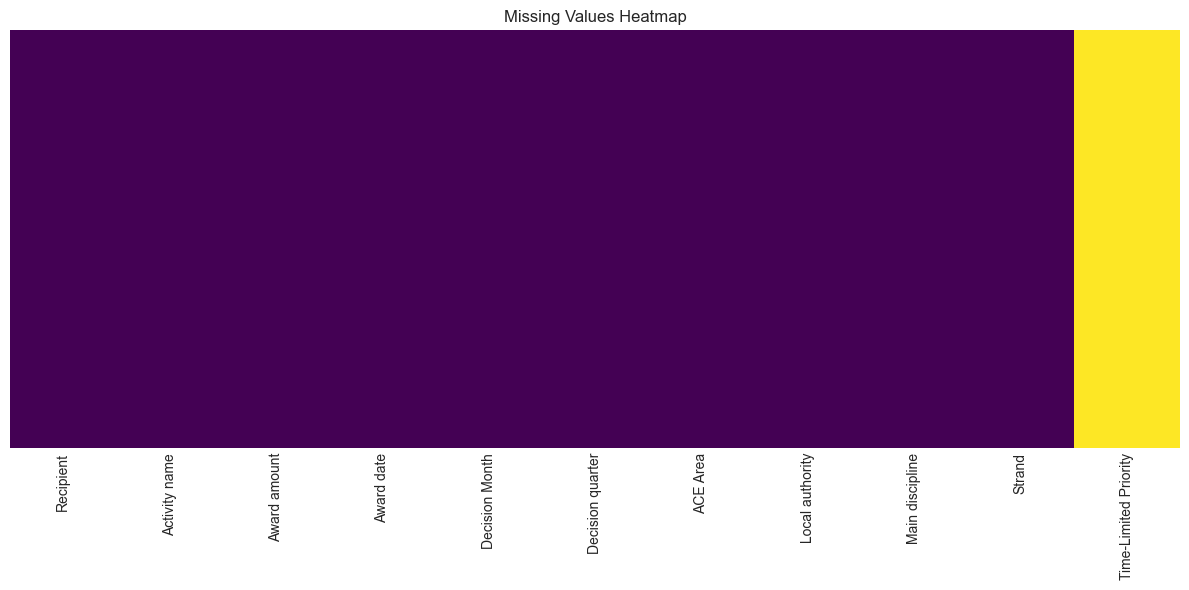

In [54]:

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Sort by missing percentage
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Percentage', ascending=False)
display(missing_info)

# Visualize missing values
if not missing_info.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

# Check for missing values
#print("Missing values:", df.isnull().sum())
# Check for duplicate rows
#print("Duplicate rows:", df.duplicated().sum())
# Check the number of unique values in each column
#print("Unique values:", df.nunique())



### Duplicate Records

In [55]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    # Show examples of duplicates
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns[0]).head())
    
# Show all columns in the dataframe
#pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe
#print("Data preview:", df.head(1))

Number of duplicate rows: 11752


,Recipient,Activity name,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand,Time-Limited Priority
9886,-,R&D - Digital & 'Other' 2020,"£20,420",23-Oct-20,October,Q3,North,Northumberland,Literature,"£15,000 and below",NaN
4010,-,R&D - Digital & 'Other' 2020,"£20,420",23-Oct-20,October,Q3,North,Northumberland,Literature,"£15,000 and below",NaN
6948,-,R&D - Digital & 'Other' 2020,"£20,420",23-Oct-20,October,Q3,North,Northumberland,Literature,"£15,000 and below",NaN
12824,-,R&D - Digital & 'Other' 2020,"£20,420",23-Oct-20,October,Q3,North,Northumberland,Literature,"£15,000 and below",NaN
1072,-,R&D - Digital & 'Other' 2020,"£20,420",23-Oct-20,October,Q3,North,Northumberland,Literature,"£15,000 and below",NaN


### Data Type Issues

In [56]:
# Check data types
print("Data types:")
display(df.dtypes)

# Identify numeric columns incorrectly stored as objects
potential_numeric = []
for col in df.select_dtypes(include=['object']).columns:
    # Check if most values in the column can be converted to numeric
    numeric_count = sum(pd.to_numeric(df[col], errors='coerce').notnull())
    if numeric_count > 0.5 * len(df):
        potential_numeric.append(col)

print(f"Potential numeric columns stored as objects: {potential_numeric}")

Data types:


Recipient                 object
Activity name             object
Award amount              object
Award date                object
Decision Month            object
Decision quarter          object
ACE Area                  object
Local authority           object
Main discipline           object
Strand                    object
Time-Limited Priority    float64
dtype: object

Potential numeric columns stored as objects: []


### Outlier Detection

In [57]:
# Function to detect outliers in numeric columns
def detect_outliers(df, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Filter out numeric columns with all NaN values
    numeric_cols = [col for col in numeric_cols if df[col].notna().any()]
    
    if not numeric_cols:
        print("No numeric columns with valid data to plot.")
        return
    
    plt.figure(figsize=(15, len(numeric_cols) * 4))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2*i+1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.subplot(len(numeric_cols), 2, 2*i+2)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

# Detect outliers in numeric columns (limit to 5 columns for clarity)
numeric_cols = df.select_dtypes(include=['number']).columns[:5]
detect_outliers(df, numeric_cols)

No numeric columns with valid data to plot.


### Inconsistent Text Values


In [58]:
# Function to detect inconsistent text values
def check_text_inconsistencies(df, sample_size=10):
    text_cols = df.select_dtypes(include=['object']).columns
    
    for col in text_cols:
        # Check for mixed case
        values = df[col].dropna().astype(str)
        if len(values) > 0:
            lower_values = sum(values.str.islower())
            upper_values = sum(values.str.isupper())
            title_values = sum(values.str.istitle())
            
            print(f"\nColumn: {col}")
            print(f"Total non-null values: {len(values)}")
            print(f"Lowercase values: {lower_values} ({lower_values/len(values)*100:.1f}%)")
            print(f"Uppercase values: {upper_values} ({upper_values/len(values)*100:.1f}%)")
            print(f"Title case values: {title_values} ({title_values/len(values)*100:.1f}%)")
            
            # Show value counts
            value_counts = df[col].value_counts().head(sample_size)
            if len(value_counts) > 1:
                print("Sample values:")
                display(value_counts)

check_text_inconsistencies(df)


Column: Recipient
Total non-null values: 14690
Lowercase values: 290 (2.0%)
Uppercase values: 330 (2.2%)
Title case values: 12195 (83.0%)
Sample values:


Recipient
Botis Seva                       15
Liga Orlovska                    15
Body Politic Dance Limited       15
Tom Wright                       10
Kieron Burke                     10
Thomas Ollendorff                10
ALFIE JAMES                      10
Matthew Linley                   10
Just Us Dance Theatre Company    10
Steven Fowler                    10
Name: count, dtype: int64


Column: Activity name
Total non-null values: 14690
Lowercase values: 145 (1.0%)
Uppercase values: 670 (4.6%)
Title case values: 7315 (49.8%)
Sample values:


Activity name
RAT                                    10
Company Development                    10
Organisational Development             10
The Stopping Place                     10
My World, My City, My Neighbourhood     5
Speakertruth                            5
Dancing Deities                         5
The Flock Narrative Podcast Series      5
Earwax Presents                         5
European Poetry Festival UK 2021        5
Name: count, dtype: int64


Column: Award amount
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 0 (0.0%)
Sample values:


Award amount
£15,000    2090
£14,950     215
£14,500     215
£14,900     155
£14,995     150
£10,000     130
£14,999     120
£14,000     110
£14,800     100
£14,990      95
Name: count, dtype: int64


Column: Award date
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 14690 (100.0%)
Sample values:


Award date
16-Dec-20    555
21-Oct-20    510
3-Mar-21     420
9-Sep-20     415
10-Feb-21    400
14-Oct-20    340
15-Oct-20    315
26-Aug-20    310
19-Aug-20    305
28-Oct-20    295
Name: count, dtype: int64


Column: Decision Month
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 14690 (100.0%)
Sample values:


Decision Month
October      2745
September    2040
March        1930
December     1885
January      1835
November     1595
August       1350
February     1305
April           5
Name: count, dtype: int64


Column: Decision quarter
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 14690 (100.0%)
Title case values: 14690 (100.0%)
Sample values:


Decision quarter
Q3    6225
Q4    5070
Q2    3390
Q1       5
Name: count, dtype: int64


Column: ACE Area
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 14690 (100.0%)
Sample values:


ACE Area
London        4145
North         3490
South East    3180
Midlands      2035
South West    1840
Name: count, dtype: int64


Column: Local authority
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 12475 (84.9%)
Sample values:


Local authority
Hackney              500
Brighton and Hove    475
Bristol, City of     470
Manchester           460
Birmingham           415
Southwark            355
Lewisham             325
Lambeth              325
Leeds                290
Liverpool            255
Name: count, dtype: int64


Column: Main discipline
Total non-null values: 14690
Lowercase values: 0 (0.0%)
Uppercase values: 0 (0.0%)
Title case values: 9945 (67.7%)
Sample values:


Main discipline
Theatre                    4845
Visual arts                2655
Music                      2395
Combined arts              1985
Dance                      1330
Literature                 1225
Not discipline specific     105
Museums                      95
Libraries                    55
Name: count, dtype: int64


Column: Strand
Total non-null values: 14690
Lowercase values: 12175 (82.9%)
Uppercase values: 0 (0.0%)
Title case values: 2105 (14.3%)
Sample values:


Strand
£15,000 and below                       12175
Above £15,000                            1710
Grassroots Music                          395
National activity £100,000 and below      340
National activity above £100,000           70
Name: count, dtype: int64

## 4. Cleaning and Transforming Data


### Handling Missing Values


In [59]:
# Function to handle missing values
def handle_missing_values(df):
    # Create a copy to avoid modifying the original DataFrame
    cleaned_df = df.copy()
    
    for col in df.columns:
        missing_pct = df[col].isnull().mean()
        
        # If more than 80% missing, consider dropping the column
        if missing_pct > 0.8:
            print(f"Dropping column {col} with {missing_pct*100:.1f}% missing values")
            cleaned_df = cleaned_df.drop(columns=[col])
        
        # For categorical columns, fill with mode
        """elif df[col].dtype == 'object':
            mode_val = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            cleaned_df[col] = cleaned_df[col].fillna(mode_val)
            print(f"Filled column {col} with mode: {mode_val}")"""
        
        # For numeric columns, fill with median
        """elif pd.api.types.is_numeric_dtype(df[col]):
        median_val = df[col].median()
        cleaned_df[col] = cleaned_df[col].fillna(median_val)
        print(f"Filled column {col} with median: {median_val}")"""
    
    return cleaned_df

# Apply missing value handling
cleaned_df = handle_missing_values(df)

Dropping column Time-Limited Priority with 100.0% missing values


### Removing Duplicates


In [60]:
# Remove duplicate rows
original_rows = len(cleaned_df)
cleaned_df = cleaned_df.drop_duplicates()
removed_rows = original_rows - len(cleaned_df)
print(f"Removed {removed_rows} duplicate rows")

Removed 11752 duplicate rows


### Fixing Data Types


In [61]:
# Function to convert columns to appropriate data types based on arts_awards schema
def fix_data_types(df):
    df_fixed = df.copy()
    
    # Create a new column for recipient_id or handle existing one
    if 'recipient_id' not in df.columns:
        print("Creating new recipient_id column")
        # Add recipient_id as the first column
        df_fixed.insert(0, 'recipient_id', None)
    else:
        # Clean and convert existing recipient_id values
        df_fixed['recipient_id'] = df_fixed['recipient_id'].astype(str).replace('nan', None)
        # Convert to numeric
        df_fixed['recipient_id'] = pd.to_numeric(df_fixed['recipient_id'], errors='coerce')
        # Flag rows where conversion failed
        invalid_ids = df_fixed['recipient_id'].isnull() & df['recipient_id'].notnull()
        if invalid_ids.any():
            print(f"Warning: {invalid_ids.sum()} invalid recipient_id values")
            print("Sample invalid values:")
            display(df.loc[invalid_ids, 'recipient_id'].head())

    # Ensure recipient_id is the first column (if it's not already)
    if 'recipient_id' in df_fixed.columns and df_fixed.columns[0] != 'recipient_id':
        # Get all columns except recipient_id
        other_cols = [col for col in df_fixed.columns if col != 'recipient_id']
        # Reorder columns with recipient_id first
        df_fixed = df_fixed[['recipient_id'] + other_cols]
        print("Moved recipient_id to be the first column")

    # Check if recipient_id values respect SMALLINT UNSIGNED constraints
    if 'recipient_id' in df_fixed.columns and not df_fixed['recipient_id'].isnull().all():
        # Check for negative values
        negative_ids = (df_fixed['recipient_id'] < 0) & df_fixed['recipient_id'].notnull()
        if negative_ids.any():
            print(f"Warning: {negative_ids.sum()} recipient_id values are negative (should be UNSIGNED)")
            print("Setting negative values to NULL")
            df_fixed.loc[negative_ids, 'recipient_id'] = None
        
        # Check for values exceeding SMALLINT range (max 65535)
        large_ids = (df_fixed['recipient_id'] > 65535) & df_fixed['recipient_id'].notnull()
        if large_ids.any():
            print(f"Warning: {large_ids.sum()} recipient_id values exceed SMALLINT UNSIGNED limit (65535)")
            print("Setting oversized values to NULL")
            df_fixed.loc[large_ids, 'recipient_id'] = None
        
        # Check for non-integer values
        fractional_ids = (df_fixed['recipient_id'] % 1 != 0) & df_fixed['recipient_id'].notnull()
        if fractional_ids.any():
            print(f"Warning: {fractional_ids.sum()} recipient_id values have decimal parts (should be integer)")
            print("Converting to integers by truncating decimal parts")
            df_fixed.loc[fractional_ids, 'recipient_id'] = df_fixed.loc[fractional_ids, 'recipient_id'].apply(int)

    # Ensure award_amount is decimal/numeric
    if 'award_amount' in df.columns:
        df_fixed['award_amount'] = pd.to_numeric(df['award_amount'], errors='coerce')
    
    # Convert award_date to datetime
    # Date format is assumed to be DD-MM-YYYY
    # If the date format is different, adjust the format string accordingly
    if 'award_date' in df.columns:
        df_fixed['award_date'] = pd.to_datetime(df['award_date'], errors='coerce')
        # Flag rows where conversion failed
        invalid_dates = df_fixed['award_date'].isnull() & df['award_date'].notnull()
        if invalid_dates.any():
            print(f"Warning: {invalid_dates.sum()} invalid date values in award_date")
            print("Sample invalid values:")
            display(df.loc[invalid_dates, 'award_date'].head())
    
    # Convert decision_month and decision_quarter to proper strings
    for col in ['decision_month', 'decision_quarter']:
        if col in df.columns:
            df_fixed[col] = df_fixed[col].astype(str).replace('nan', None)
    
    # Convert text fields according to schema
    text_fields = ['recipient', 'activity_name', 'ace_area', 'local_authority', 'main_discipline']
    for col in text_fields:
        if col in df.columns:
            df_fixed[col] = df_fixed[col].astype(str).replace('nan', None)
    
    return df_fixed

# Fix data types
try:
    cleaned_df = fix_data_types(cleaned_df)
    print("Data types fixed according to arts_awards schema")
    display(cleaned_df.dtypes)
except NameError as e:
    print(f"Error: {e}")

Creating new recipient_id column
Data types fixed according to arts_awards schema


recipient_id        object
Recipient           object
Activity name       object
Award amount        object
Award date          object
Decision Month      object
Decision quarter    object
ACE Area            object
Local authority     object
Main discipline     object
Strand              object
dtype: object

### Standardizing Text Values


In [62]:
# Function to standardize text values according to arts_awards schema
def standardize_text(df):
    df_std = df.copy()
    
    # Standardize recipient (NVARCHAR(50))
    if 'recipient' in df.columns:
        # Title case for organizations/people names
        df_std['recipient'] = df_std['recipient'].str.title()
        # Truncate if needed
        if df_std['recipient'].str.len().max() > 150:
            print("Warning: Some recipient names exceed 50 characters and will be truncated")
            df_std['recipient'] = df_std['recipient'].str.slice(0, 150)
    
    # Standardize activity_name (NVARCHAR(200))
    if 'activity_name' in df.columns:
        # Title case for activity names
        df_std['activity_name'] = df_std['activity_name'].str.title()
        # Truncate if needed
        if df_std['activity_name'].str.len().max() > 300:
            print("Warning: Some activity names exceed 200 characters and will be truncated")
            df_std['activity_name'] = df_std['activity_name'].str.slice(0, 300)
    
    # Standardize decision_month (VARCHAR(15))
    if 'decision_month' in df.columns:
        # Capitalize month names
        df_std['decision_month'] = df_std['decision_month'].str.capitalize()
        # Ensure valid month names
        valid_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August', 'September', 'October', 'November', 'December']
        invalid_months = ~df_std['decision_month'].isin(valid_months) & (df_std['decision_month'].notna())
        if invalid_months.any():
            print(f"Warning: {invalid_months.sum()} invalid month values in decision_month")
            print("Invalid months will be standardized or set to None")
            
            # Attempt to standardize common variations
            month_map = {
                'jan': 'January', 'feb': 'February', 'mar': 'March', 
                'apr': 'April', 'may': 'May', 'jun': 'June',
                'jul': 'July', 'aug': 'August', 'sep': 'September', 'sept': 'September',
                'oct': 'October', 'nov': 'November', 'dec': 'December'
            }
            
            for abbr, full in month_map.items():
                mask = df_std['decision_month'].str.lower().str.startswith(abbr, na=False)
                df_std.loc[mask, 'decision_month'] = full
    
    # Standardize decision_quarter (VARCHAR(2))
    if 'decision_quarter' in df.columns:
        # Standardize quarter format (Q1, Q2, Q3, Q4)
        df_std['decision_quarter'] = df_std['decision_quarter'].str.upper()
        
        # Fix common variations
        quarter_map = {'1': 'Q1', '2': 'Q2', '3': 'Q3', '4': 'Q4',
                      'QTR1': 'Q1', 'QTR2': 'Q2', 'QTR3': 'Q3', 'QTR4': 'Q4'}
        
        for var, std in quarter_map.items():
            mask = df_std['decision_quarter'].str.strip() == var
            df_std.loc[mask, 'decision_quarter'] = std
        
        # Validate quarters
        valid_quarters = ['Q1', 'Q2', 'Q3', 'Q4']
        invalid_quarters = ~df_std['decision_quarter'].isin(valid_quarters) & (df_std['decision_quarter'].notna())
        
        if invalid_quarters.any():
            print(f"Warning: {invalid_quarters.sum()} invalid quarter values in decision_quarter")
            print("Sample invalid values:")
            display(df.loc[invalid_quarters, 'decision_quarter'].head())
    
    # Standardize ace_area and local_authority (NVARCHAR(50))
    for col in ['ace_area', 'local_authority']:
        if col in df.columns:
            # Title case for geographical names
            df_std[col] = df_std[col].str.title()
            # Truncate if needed
            if df_std[col].str.len().max() > 100:
                print(f"Warning: Some {col} values exceed 50 characters and will be truncated")
                df_std[col] = df_std[col].str.slice(0, 100)
    
    # Standardize main_discipline (VARCHAR(20))
    if 'main_discipline' in df.columns:
        # Title case for discipline names
        df_std['main_discipline'] = df_std['main_discipline'].str.title()
        # Truncate if needed
        if df_std['main_discipline'].str.len().max() > 50:
            print(f"Warning: Some main_discipline values exceed 20 characters and will be truncated")
            df_std['main_discipline'] = df_std['main_discipline'].str.slice(0, 50)
        
        # You might want to standardize common disciplines here
        # Example:
        discipline_map = {
            'Vis Art': 'Visual Arts',
            'Visual': 'Visual Arts',
            'Music': 'Music',
            'Theatre': 'Theatre',
            'Theater': 'Theatre',
            'Dance': 'Dance',
            'Lit': 'Literature',
            'Literature': 'Literature'
            # Add more mappings as needed
        }
        
        for old, new in discipline_map.items():
            mask = df_std['main_discipline'].str.contains(old, case=False, na=False)
            if mask.any() and new[:50] != old[:20]:  # Only replace if different
                print(f"Standardized '{old}' to '{new}' in main_discipline")
                df_std.loc[mask, 'main_discipline'] = new[:20]  # Apply with truncation
    
    return df_std

# Standardize text values
cleaned_df = standardize_text(cleaned_df)
print("Text values standardized according to arts_awards schema")
display(cleaned_df.head(3))


Text values standardized according to arts_awards schema


,recipient_id,Recipient,Activity name,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand
0,None,Santhoshkumar Thadavath Gopalakrishnan Nair,Dancing Deities,"£13,250",6-Apr-20,April,Q1,North,Bradford,Dance,"£15,000 and below"
1,None,Sheba Soul Ensemble,Questions and answers,"£15,000",11-Aug-20,August,Q2,South West,"Bristol, City of",Theatre,"£15,000 and below"
2,None,Southampton Music Hub,Digital Native Artists (DNA) Programme,"£15,000",11-Aug-20,August,Q2,South West,Southampton,Music,"£15,000 and below"


### Handling Outliers


In [63]:
# Function to handle outliers using IQR method
def handle_outliers(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['number']).columns
    
    df_clean = df.copy()
    
    for col in cols:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        if outliers > 0:
            print(f"Column {col}: Found {outliers} outliers")
            
            # Cap outliers instead of removing them
            df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
            print(f"Capped outliers in {col} to range [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    return df_clean

# Handle outliers in numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns
cleaned_df = handle_outliers(cleaned_df, numeric_cols)
display(cleaned_df.describe())

,recipient_id,Recipient,Activity name,Award amount,Award date,Decision Month,Decision quarter,ACE Area,Local authority,Main discipline,Strand
count,0,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938
unique,0,2816,2934,1712,104,9,4,5,303,9,5
top,NaN,Botis Seva,RAT,"£15,000",16-Dec-20,October,Q3,London,Hackney,Theatre,"£15,000 and below"
freq,NaN,3,2,418,111,549,1245,829,100,969,2435


### Renaming Columns for SQL Compatibility


In [64]:
# Function to rename columns according to arts_awards schema
def rename_columns_for_schema(df):
    # Define the expected column names for arts_awards schema
    schema_columns = [
        'recipient_id', 'recipient', 'activity_name', 'award_amount',
        'award_date', 'decision_month', 'decision_quarter', 'ace_area',
        'local_authority', 'main_discipline'
    ]
    
    # Create a mapping of current columns to schema columns
    current_cols = df.columns
    rename_dict = {}
    
    # Try to match existing columns to schema columns based on similarity
    for schema_col in schema_columns:
        # Check for direct match first
        if schema_col in current_cols:
            continue
            
        # Check for case-insensitive match
        matches = [col for col in current_cols if col.lower() == schema_col.lower()]
        if matches:
            rename_dict[matches[0]] = schema_col
            continue
            
        # Check for similar names (handles spaces, underscores, etc.)
        schema_col_clean = schema_col.lower().replace('_', '')
        for col in current_cols:
            col_clean = col.lower().replace('_', '').replace(' ', '')
            
            # Match on various patterns
            if (schema_col_clean in col_clean or 
                col_clean in schema_col_clean or
                (schema_col_clean[:5] == col_clean[:5] and len(col_clean) > 4)):
                
                # Check if this column is already mapped
                if col not in rename_dict:
                    rename_dict[col] = schema_col
                    break
    
    # Apply the renaming
    if rename_dict:
        print("Renaming columns to match arts_awards schema:")
        for old, new in rename_dict.items():
            print(f"  {old} -> {new}")
        
        df_renamed = df.rename(columns=rename_dict)
    else:
        df_renamed = df.copy()
        print("No columns needed renaming")
    
    # Check for missing schema columns
    missing_cols = [col for col in schema_columns if col not in df_renamed.columns]
    if missing_cols:
        print(f"\nWarning: The following schema columns are missing: {missing_cols}")
        
        # Add missing columns with appropriate null values
        for col in missing_cols:
            if col == 'recipient_id':
                # Auto-increment field can be left for MySQL to handle
                continue
            elif col == 'award_date':
                # Required DATE field - add as NaT for now, but will need attention
                df_renamed[col] = pd.NaT
                print(f"Added missing required column '{col}' with NaT values - needs attention!")
            elif col in ['recipient', 'activity_name']:
                # Required NVARCHAR fields
                df_renamed[col] = None
                print(f"Added missing required column '{col}' with NULL values - needs attention!")
            else:
                # Optional fields
                df_renamed[col] = None
                print(f"Added missing optional column '{col}' with NULL values")
    
    # Check for extra columns not in the schema
    extra_cols = [col for col in df_renamed.columns if col not in schema_columns]
    if extra_cols:
        print(f"\nInfo: The following columns are not in the arts_awards schema: {extra_cols}")
        print("These columns will be included in the output but won't be imported to the schema")
    
    return df_renamed

# Rename columns to match schema
cleaned_df = rename_columns_for_schema(cleaned_df)

Renaming columns to match arts_awards schema:
  Recipient -> recipient
  Activity name -> activity_name
  Award amount -> award_amount
  Award date -> award_date
  Decision Month -> decision_month
  Decision quarter -> decision_quarter
  ACE Area -> ace_area
  Local authority -> local_authority
  Main discipline -> main_discipline

Info: The following columns are not in the arts_awards schema: ['Strand']
These columns will be included in the output but won't be imported to the schema


## Final Validation and Export

In [70]:
#  export the cleaned dataframe
output_path = 'cleaned_arts_awards.csv'
try:
    cleaned_df.to_csv(output_path, index=False, date_format='%Y-%m-%d')
    print(f"\nCleaned data exported to {output_path}")
except Exception as e:
    print(f"\nError exporting cleaned data to CSV: {e}")
# Optional: Uncomment to visualize the cleaned dataframe
#display(cleaned_df.head(10))



    # Export the cleaned dataframe
    #output_path = 'cleaned_arts_awards.csv'
    #try:
        #cleaned_df.to_csv(output_path, index=False, date_format='%Y-%m-%d')
        #print(f"\nCleaned data exported to {output_path}")
    #except Exception as e:
        #print(f"\nError exporting cleaned data to CSV: {e}")



Cleaned data exported to cleaned_arts_awards.csv
